# Testing loading afterpulse

This notebook will be for testing if afterpulse files can easily be loaded through the `load_mpl_inline` framework

In [1]:
import xarray as xr
import numpy as np
import os

import matplotlib.pyplot as plt

import load_mpl_inline
import raw_to_ingested

In [15]:
dir_afterpulse = '/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/raw'
fname_afterpulse = '202205251346.mpl.gz'

fname = os.path.join(dir_afterpulse, fname_afterpulse)

In [16]:
ds = load_mpl_inline.load_mpl_inline(fname)

In [17]:
ds

<xarray.Dataset>
Dimensions:                      (profile: 163, range: 1999)
Dimensions without coordinates: profile, range
Data variables: (12/52)
    unit                         (profile) float32 108.0 108.0 ... 108.0 108.0
    version                      (profile) float32 413.0 413.0 ... 413.0 413.0
    shots_sum                    (profile) float64 1.25e+04 ... 1.25e+04
    trigger_frequency            (profile) float64 2.5e+03 2.5e+03 ... 2.5e+03
    energy_monitor               (profile) float64 4.954e+03 ... 4.692e+03
    temp_0                       (profile) float64 2.382e+03 ... 2.39e+03
    ...                           ...
    channel_2                    (profile, range) float32 0.0976 ... 0.1152
    time_utc                     (profile) object '2022-05-25T13:46:29' ... '...
    time                         (profile) datetime64[ns] 2022-05-25T13:46:29...
    c                            float64 2.998e+08
    nrb_copol                    (profile, range) float64 -4.956e-08 ... 3.368
    nrb_crosspol                 (profile, range) float64 3.781e-08 ... -3.466
Attributes:
    created:   2023-02-16T:16:44:15Z
    software:  mpl2nc (https://github.com/peterkuma/mpl2nc)
    version:   1.3.5

In [18]:
ds_ing = raw_to_ingested.raw_to_ingested(None, None, data_loaded=ds)
ds_ing

<xarray.Dataset>
Dimensions:          (time: 163, height: 1200)
Coordinates:
  * time             (time) datetime64[ns] 2022-05-25T13:46:29 ... 2022-05-25...
  * height           (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables: (12/19)
    base_time        datetime64[ns] 2022-05-25T13:46:29
    time_offset      (time) timedelta64[ns] 00:00:00 00:00:05 ... 00:13:30
    hour             (time) float32 13.77 13.78 13.78 13.78 ... 14.0 14.0 14.0
    nshots           (time) int32 12500 12500 12500 12500 ... 12500 12500 12500
    rep_rate         (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy           (time) float32 4.954 4.955 4.953 4.952 ... 4.692 4.69 4.692
    ...               ...
    initial_cbh      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    backscatter_1    (time, height) float32 0.1152 0.1344 ... 0.1056 0.1184
    backscatter_2    (time, height) float32 0.0976 0.1104 ... 0.1168 0.0848
    lat              float32 72.6
    lon              float32 -38.42
    alt              float32 3.2e+03
Attributes:
    Date_created:              2023-02-16T16:44:15 UTC
    Ingest_version:            Id: mpl/raw_to_ingested.py ,v 0.1 2023/02/14 
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...

In [19]:
afterpulse_1 = ds_ing.backscatter_1.mean(dim='time')
afterpulse_2 = ds_ing.backscatter_2.mean(dim='time')

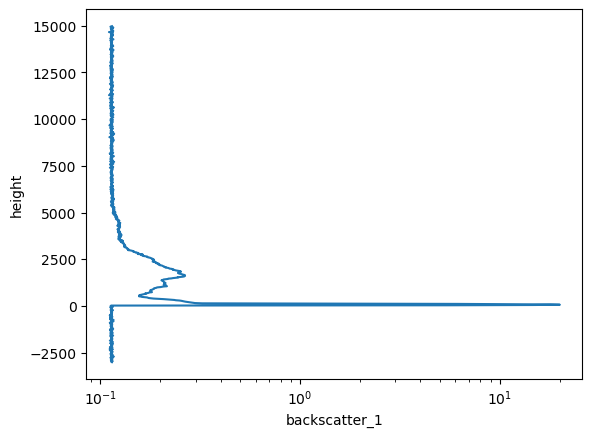

In [20]:
afterpulse_1.plot(y='height',xscale='log')

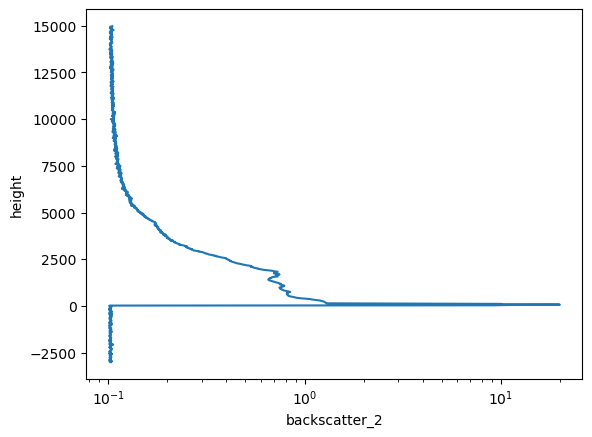

In [21]:
afterpulse_2.plot(y='height',xscale='log')

In [22]:
ds_new = xr.Dataset()
ds_new['afterpulse_1'] = afterpulse_1
ds_new['afterpulse_2'] = afterpulse_2

ds_new

<xarray.Dataset>
Dimensions:       (height: 1200)
Coordinates:
  * height        (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables:
    afterpulse_1  (height) float32 0.1144 0.1137 0.1146 ... 0.1124 0.1133 0.1145
    afterpulse_2  (height) float32 0.1029 0.1019 0.1021 ... 0.1022 0.1039 0.1048

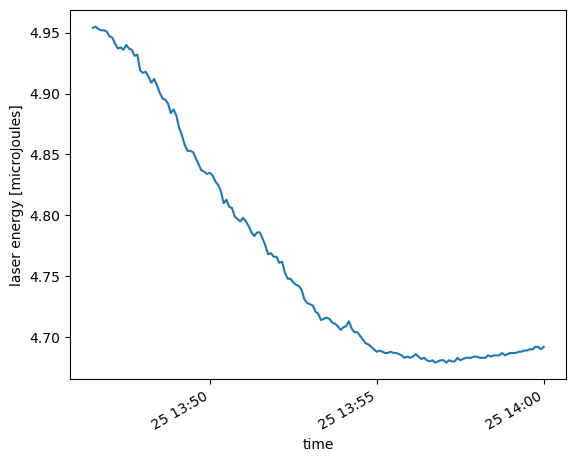

In [23]:
ds_ing.energy.plot()

In [24]:
# energy correction for the afterpulse signals
E0 = ds_ing.energy.values[0]

E_ratio = ds_ing.energy / E0

aft1 = (ds_ing.backscatter_1 * E_ratio).sum(dim='time') / E_ratio.sum()
aft2 = (ds_ing.backscatter_2 * E_ratio).sum(dim='time') / E_ratio.sum()

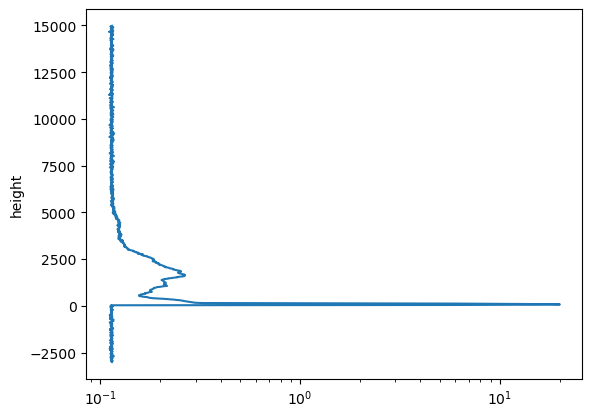

In [25]:
aft1.plot(y='height',xscale='log')

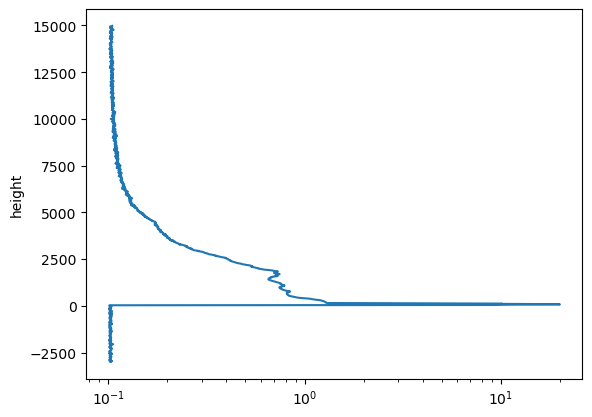

In [26]:
aft2.plot(y='height',xscale='log')

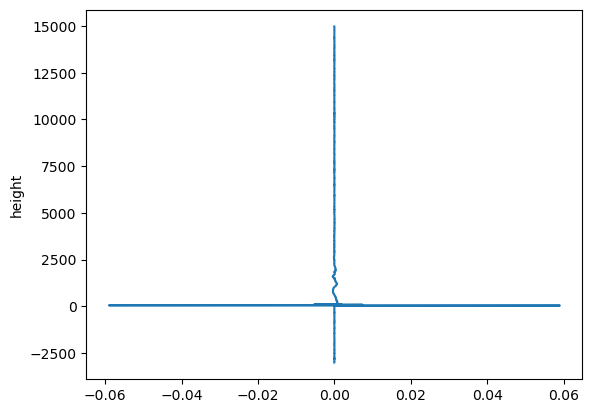

In [27]:
(aft1 - afterpulse_1).plot(y='height')